In [81]:
import pandas as pd
import numpy as np


In [82]:
r_cols = ["user_id", "movie_id", "rating"]
ratings = pd.read_csv(
    "data/u.data",
    sep="\t",
    names=r_cols,
    usecols=range(3),
    encoding="ISO-8859-1",
)

m_cols = ["movie_id", "title"]

movies = pd.read_csv(
    "data/u.item",
    sep="|",
    names=m_cols,
    usecols=range(2),
    encoding="ISO-8859-1",
)

ratings = pd.merge(movies, ratings)
userRatings = ratings.pivot_table(index=['user_id'],columns=['title'],values='rating')

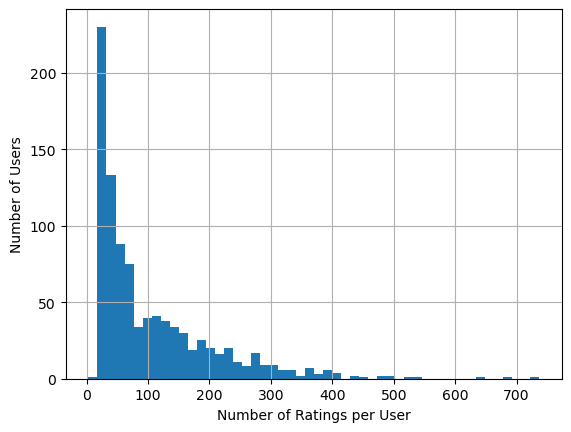

In [83]:
import matplotlib.pyplot as plt
user_rating_counts = ratings.groupby("user_id")["rating"].count()
user_rating_counts
plt.grid(True)
plt.hist(user_rating_counts,bins=50)
plt.xlabel('Number of Ratings per User')
plt.ylabel('Number of Users')
plt.show()

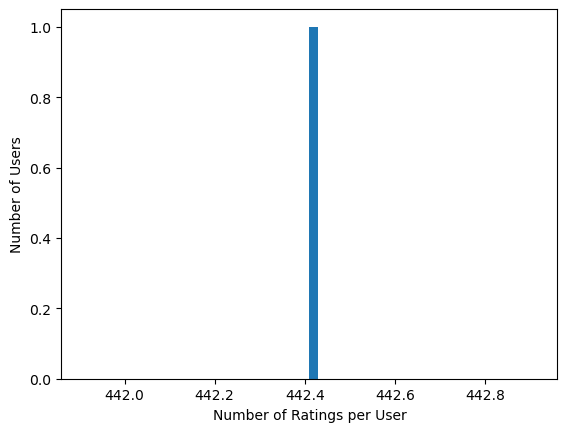

In [84]:
upper_limit = user_rating_counts.quantile(0.99)
upper_limit
plt.hist(upper_limit,bins=50)
plt.xlabel('Number of Ratings per User')
plt.ylabel('Number of Users')
plt.show()

In [85]:
normal_users = user_rating_counts[user_rating_counts<upper_limit].index
filtered_ratings = userRatings[userRatings.index.isin(normal_users)]

print(filtered_ratings)

title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
0                              NaN           NaN                    NaN   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   
...                            ...           ...                    ...   
939                            NaN           NaN                    NaN   
940                            NaN           NaN                    NaN   
941                            NaN           NaN                    NaN   
942                            NaN           NaN                    NaN   
943                            NaN           NaN                    NaN   

title    12 Angry Men (1

In [86]:
corrMatrix = filtered_ratings.corr(method="pearson", min_periods=10)

In [87]:
myRatings = filtered_ratings.loc[0].dropna()
myRatings = myRatings - myRatings.mean()

In [88]:
simCandidates = pd.Series(dtype=float)
for i in range(0, len(myRatings.index)):
    sims = corrMatrix[myRatings.index[i]].dropna()
    sims = sims.map(lambda x: x * myRatings[i])
    sims.sort_values(inplace=True, ascending=False)
    simCandidates = pd.concat([simCandidates, sims])

C:\Users\peihe\AppData\Local\Temp\ipykernel_10552\213412219.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sims = sims.map(lambda x: x * myRatings[i])
C:\Users\peihe\AppData\Local\Temp\ipykernel_10552\213412219.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sims = sims.map(lambda x: x * myRatings[i])
C:\Users\peihe\AppData\Local\Temp\ipykernel_10552\213412219.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sims = sims.

In [89]:
simCandidates = simCandidates.groupby(simCandidates.index).sum()
simCandidates.sort_values(inplace=True, ascending=False)
simCandidates = simCandidates.drop(myRatings.index)

